# Ecoulement laminaire dans un coude

In [1]:
from trustutils import run

run.introduction('D. Jamet')

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description

On  calcule  l’écoulement  bidimensionnel  dans  un  coude.   L’écoulement  est  laminaire  et  on  néglige  la convection.   Les  parois  du  domaine  sont  fixes  et  une condition d'adhérence y est imposée. Une  solution analytique à ce problème existe et on compare les résultats calculés par GENEPI à cette solution analytique.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Eclt_coude/build)

### Parameters TRUST
* Version TRUST:  
* Binary (le binaire)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","eclt_coude.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* ./eclt_coude.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.2s.


## Champs de pression et de vitesse
Dans cette partie, on compare le champ de pression calculé par GENEPI et le champ de pression analytique.
### Champs de pression et de vitesse calculés
Le champ de pression calculé par GENEPI est tracé et le champ de pression analytique est donné pardes iso-valeurs.

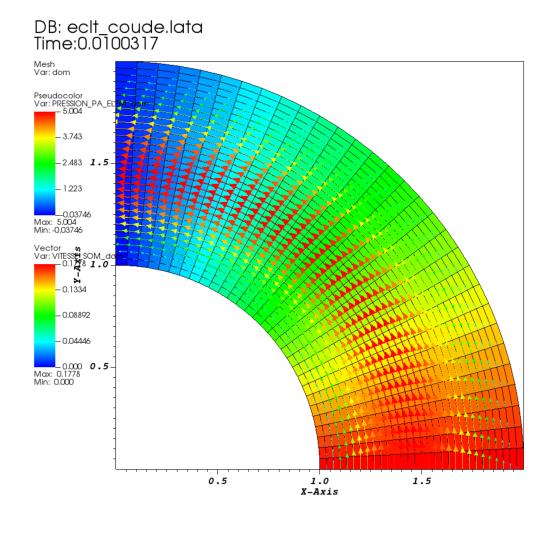

In [4]:
from trustutils import visit
Graph=visit.Show("./eclt_coude.lata","Pseudocolor","PRESSION_PA_ELEM_dom")
Graph.addField("./eclt_coude.lata","Vector","VITESSE_SOM_dom")
Graph.plot()


### Champs de pression et de vitesse analytiques

Le champ de pression analytique est tracé et le champ de pression calculé par GENEPI est donné pardes iso-valeurs.

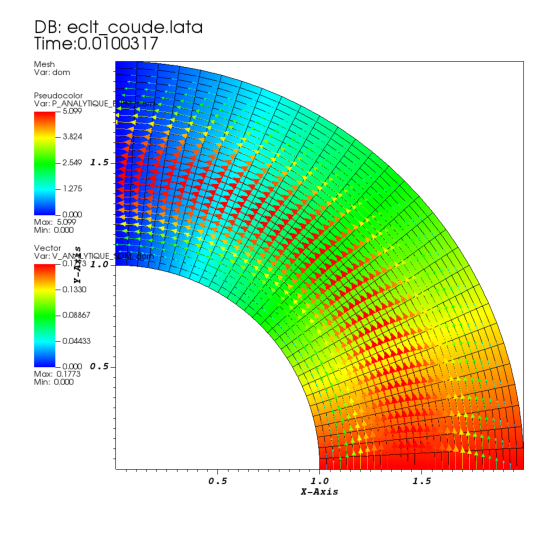

In [5]:
from trustutils import visit
Graph=visit.Show("./eclt_coude.lata","Mesh",'dom')

Graph.visitCommand("DefineScalarExpression(\"P_ANALYTIQUE_ELEM_dom\",\"(-0.225E1*acos(coord(dom)[0]/sqrt(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1]))/ln(2.0)+0.1125E1*0.3141592653589793E1/ln(2.0))\")")
Graph.addField("./eclt_coude.lata","Pseudocolor","P_ANALYTIQUE_ELEM_dom")

Graph.visitCommand("DefineVectorExpression(\"V_ANALYTIQUE_SOM_dom\",\"{(-(8.0*ln(2.0)*coord(dom)[0]*coord(dom)[0]+8.0*ln(2.0)*coord(dom)[1]*coord(dom)[1]-8.0*ln(2.0)-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[0]*coord(dom)[0]-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[1]*coord(dom)[1])*sqrt(coord(dom)[1]*coord(dom)[1]/(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1]))/sqrt(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])/ln(2.0)/8.0),((8.0*ln(2.0)*coord(dom)[0]*coord(dom)[0]+8.0*ln(2.0)*coord(dom)[1]*coord(dom)[1]-8.0*ln(2.0)-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[0]*coord(dom)[0]-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[1]*coord(dom)[1])*coord(dom)[0]/(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])/ln(2.0)/8.0)}\")")

Graph.addField("./eclt_coude.lata","Vector","V_ANALYTIQUE_SOM_dom")
Graph.plot()

### Erreurs sur les champs de pression et de vitesse

On trace l’erreur entre le champ de pression calculé par GENEPI et le champ de pression analytique.Sont superposés le champ de l’erreur et les iso-valeurs de l’erreur (pour plus de clarté, le maillage n’est pas tracé).

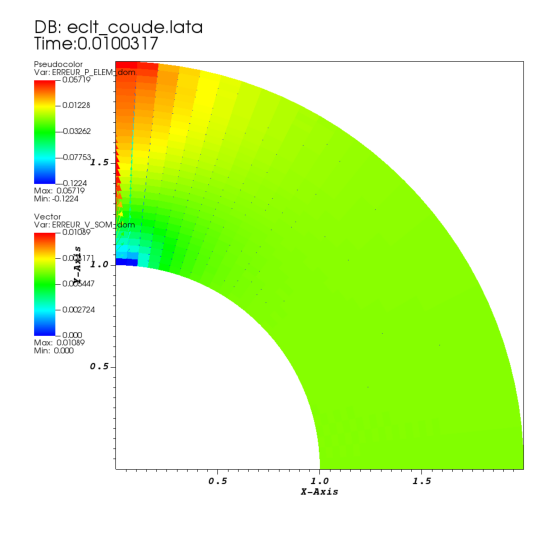

In [6]:
from trustutils import visit
Graph=visit.Show(empty=True)

Graph.visitCommand("DefineScalarExpression(\"ERREUR_P_ELEM_dom\",\"PRESSION_PA_ELEM_dom-(-0.225E1*acos(coord(dom)[0]/sqrt(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1]))/ln(2.0)+0.1125E1*0.3141592653589793E1/ln(2.0))\")")
Graph.addField("./eclt_coude.lata","Pseudocolor","ERREUR_P_ELEM_dom")

Graph.visitCommand("DefineVectorExpression(\"V_ANALYTIQUE_SOM_dom\",\"{(-(8.0*ln(2.0)*coord(dom)[0]*coord(dom)[0]+8.0*ln(2.0)*coord(dom)[1]*coord(dom)[1]-8.0*ln(2.0)-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[0]*coord(dom)[0]-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[1]*coord(dom)[1])*sqrt(coord(dom)[1]*coord(dom)[1]/(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1]))/sqrt(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])/ln(2.0)/8.0),((8.0*ln(2.0)*coord(dom)[0]*coord(dom)[0]+8.0*ln(2.0)*coord(dom)[1]*coord(dom)[1]-8.0*ln(2.0)-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[0]*coord(dom)[0]-3.0*ln(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])*coord(dom)[1]*coord(dom)[1])*coord(dom)[0]/(coord(dom)[0]*coord(dom)[0]+coord(dom)[1]*coord(dom)[1])/ln(2.0)/8.0)}\")")
Graph.visitCommand("DefineVectorExpression(\"ERREUR_V_SOM_dom\",\"VITESSE_SOM_dom-V_ANALYTIQUE_SOM_dom\")")
Graph.addField("./eclt_coude.lata","Vector","ERREUR_V_SOM_dom")
Graph.plot()

## Perte de pression dans la conduite
La pression étant connue analytiquement, on peut comparer les pertes de pression analytique et calculéepar GENEPI. Ces valeurs sont donnés dans le tableau suivant ainsi que l’erreur correspondante.
### Comparaison théorie/numérique

In [7]:
from trustutils.jupyter import plot
import numpy as np

data=plot.loadText("./eclt_coude_fin.out")
data=data[7]-data[6]

Table=plot.Table(["Perte de pression"])
Table.addLigne(5.099,"Analytique")
Table.addLigne(data,"Calcul")
Table.addLigne(int((5.099-data)*10000)/(100*data),"erreur en %") # difference formule erreur ref int(v1*10000)/100.????
Table.df

,Perte de pression
Analytique,5.099000
Calcul,4.920406
erreur en %,3.627750


## Data Files
### eclt_coude

In [9]:
from trustutils import run

run.dumpDataset("./eclt_coude.data")

 # Hydraulique 2D pour tester le terme visqueux dans un cas 2D #
 
 dimension 2
 
 Pb_hydraulique pb
 
 Domaine dom
 
 Mailler dom
 {
         Pave Cavite
         {
                 Origine 0. 0.
                 Nombre_de_noeuds 31 31
                 Longueurs 1. 1.
         }
         {
                 Bord Gauche   X = 0.  0. <= Y <= 1.
                 Bord Droit    X = 1.  0. <= Y <= 1.
                 Bord Bas      Y = 0.  0. <= X <= 1.
                 Bord Haut     Y = 1.  0. <= X <= 1.
         }
 }
 
 transformer dom (1.+x)*cos(0.3141592653589793E1*y/2.) (1.+x)*sin(0.3141592653589793E1*y/2.)
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 1.e-2
 	 dt_min 5.e-7
 	 dt_max 5.e-3
 	 dt_impr 1.e-1
 	 dt_sauv 1.e-3
 	 seuil_statio 1.e-8
 }
 
 Fluide_Incompressible eau
 Read eau
 {
 	 mu Champ_Fonc_XYZ dom 1 1.5
 	 rho Champ_Uniforme 1 2.
 }
 
 Associate pb dom
 Associate pb sch
 Associate pb eau
 
 Discretize pb dis
 
 Read pb
 {
 	 Navier_Stokes_standard